# **Description of the problem - machine learning libraries and packages experimental setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import time

from zipfile import ZipFile


In [3]:
from sklearn.model_selection import RandomizedSearchCV


In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d faresabbasai2022/heart-diseases-prediction-with-streamlit

  0% 0.00/719k [00:00<?, ?B/s]
100% 719k/719k [00:00<00:00, 130MB/s]


In [6]:
# extracting the compessed Dataset
data = '/content/heart-diseases-prediction-with-streamlit.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

drive	   heart-diseases-prediction-with-streamlit.zip  kaggle.json
heart.csv  heart.jpeg					 sample_data


#**Choice of dataset Data Mining**


In [8]:
# Load the dataset
data_path = '/content/heart.csv'
Heart_data = pd.read_csv(data_path)

# Display the first few rows to confirm it's loaded correctly
print(Heart_data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [9]:
print(Heart_data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# drop the missing data
Heart_data = Heart_data.dropna()

# the shape after dropping the missing data
Heart_data.shape

(1027, 14)

In [11]:
# Showing the data after Converting categorical values to numeric values
Heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
# Original data frame had 10 columns, we now have 14 columns
Heart_data.shape

(1027, 14)

In [13]:
# Displaying statistical information about the dataset
print(Heart_data.describe())

               age          sex           cp     trestbps         chol  \
count  1027.000000  1027.000000  1027.000000  1027.000000  1027.000000   
mean     54.411879     0.695229     0.940604   131.530672   245.764362   
std       9.144326     0.460535     1.029476    17.595625    51.817785   
min      18.000000     0.000000     0.000000    90.000000   125.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   200.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1027.000000  1027.000000  1027.000000  1027.000000  1027.000000   
mean      0.148978     0.528724   148.960078     0.335930     1.069426   
std       0.356240     0.527880    23.246693     0.472545     1.174858   
min       0.000000     0.000000    70

In [14]:
# Information about data types and non-null counts
print(Heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1027 non-null   int64  
 1   sex       1027 non-null   int64  
 2   cp        1027 non-null   int64  
 3   trestbps  1027 non-null   int64  
 4   chol      1027 non-null   int64  
 5   fbs       1027 non-null   int64  
 6   restecg   1027 non-null   int64  
 7   thalach   1027 non-null   int64  
 8   exang     1027 non-null   int64  
 9   oldpeak   1027 non-null   float64
 10  slope     1027 non-null   int64  
 11  ca        1027 non-null   int64  
 12  thal      1027 non-null   int64  
 13  target    1027 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.5 KB
None


# **Correlation Analysis:**
To check how each feature correlates with the target variable

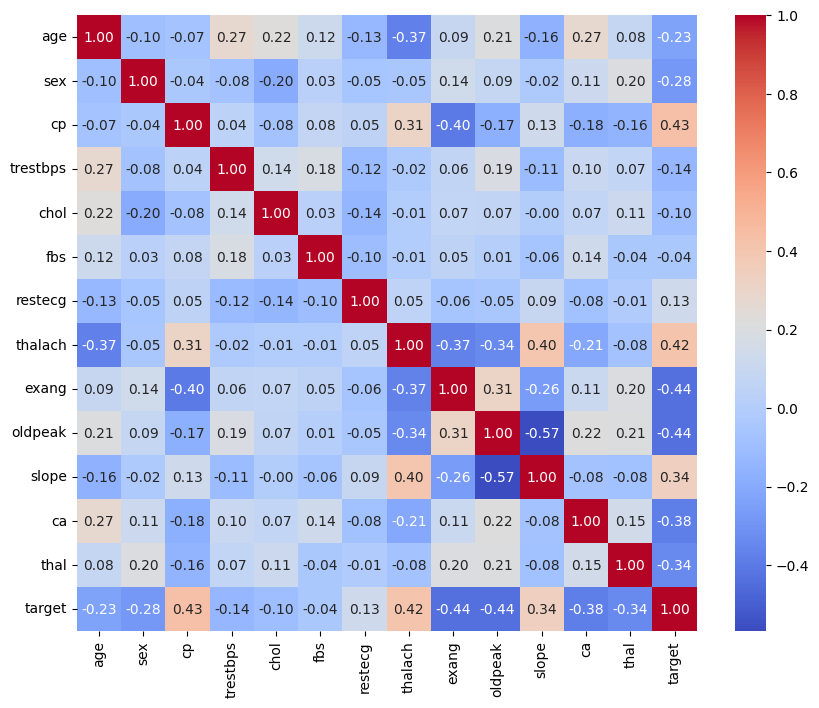

In [15]:
# Calculate the correlation matrix
corr_matrix = Heart_data.corr()

# Use seaborn to create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

# **Splitting the Data into Training and Testing Sets**


In [44]:
# 'thalach (Maximum Heart Rate Achieved): Highest heart rate achieved.' is the target variable
X = Heart_data.drop('thalach', axis=1) # Features
y = Heart_data['thalach']              # Target


In [45]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Normalization**


In [46]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Choice of machine learning techniques**

# **Optimization/Parametrization**


# **Models Training**

# **1- Linear Regression**

In [47]:
# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

# **2-Random Forest Regressor**


In [57]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, Y_train)

RandomForestRegressor(random_state=42)

# **3- Gradient Boosting Regressor**


In [58]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_scaled, Y_train)

GradientBoostingRegressor(random_state=42)

# **Evaluate the performance of the machine learning methods metrics**


# **Evaluate Model**

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming rf_reg and gb_reg are already trained...

# Predictions
lin_predictions = lin_reg.predict(X_test)
rf_predictions = rf_reg.predict(X_test_scaled)
gb_predictions = gb_reg.predict(X_test_scaled)

# Calculate the metrics for each model
lin_mse = mean_squared_error(Y_test, lin_predictions)
lin_mae = mean_absolute_error(Y_test, lin_predictions)
lin_r2 = r2_score(Y_test, lin_predictions)

rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

gb_mse = mean_squared_error(Y_test, gb_predictions)
gb_mae = mean_absolute_error(Y_test, gb_predictions)
gb_r2 = r2_score(Y_test, gb_predictions)

# Create a dictionary with the model names and their corresponding metrics
model_metrics = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MSE': [lin_mse, rf_mse, gb_mse],
    'MAE': [lin_mae, rf_mae, gb_mae],
    'R2': [lin_r2, rf_r2, gb_r2]
}

# Convert the dictionary to a DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print(comparison_df)


                         Model         MSE        MAE        R2
0            Linear Regression  283.690883  13.259960  0.462960
1      Random Forest Regressor   18.895370   2.681845  0.964230
2  Gradient Boosting Regressor  115.191848   8.174055  0.781937


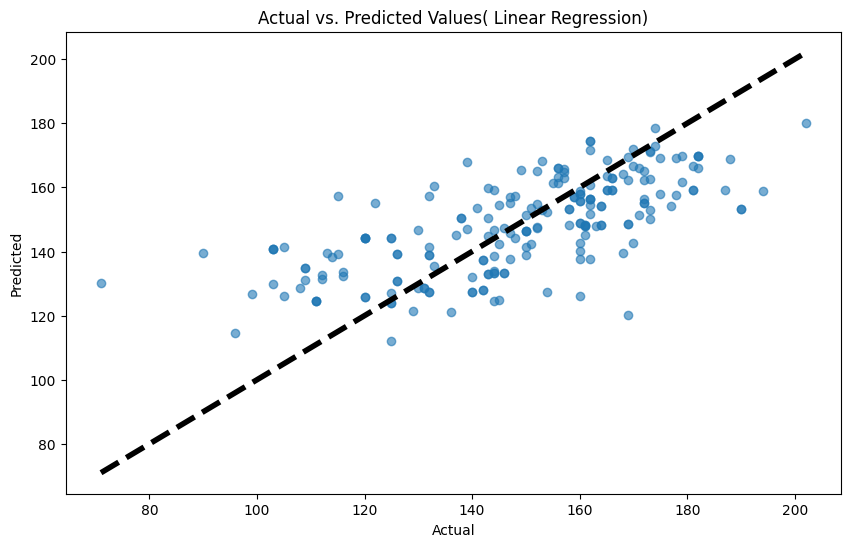

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, lin_predictions, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values( Linear Regression)')
plt.show()


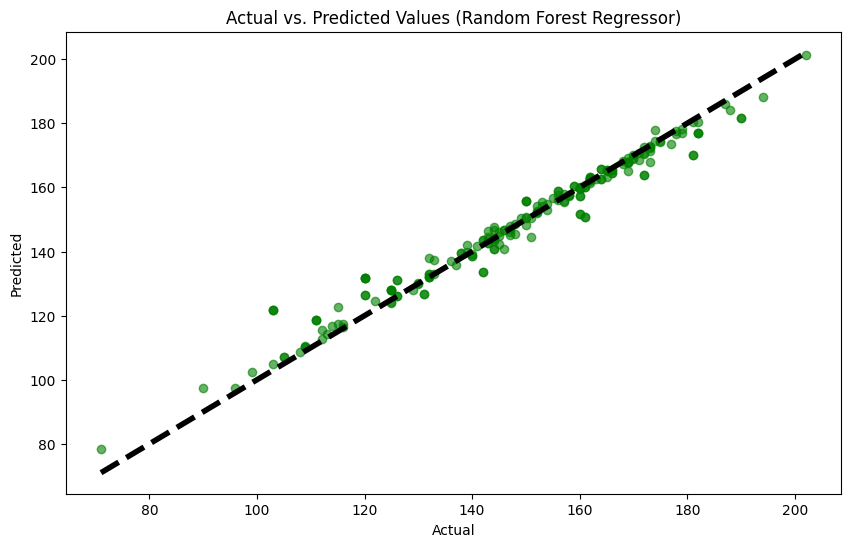

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_predictions, alpha=0.6, color='green')  # Using green for differentiation
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.show()


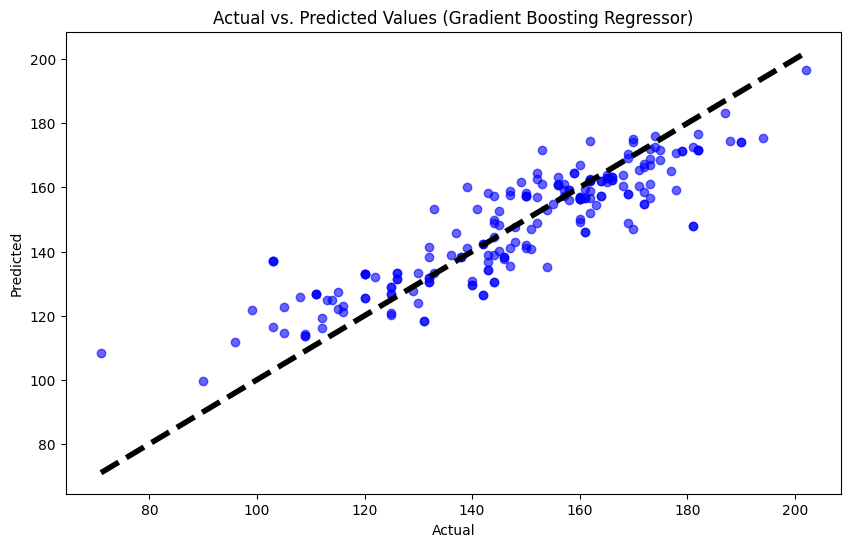

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, gb_predictions, alpha=0.6, color='blue')  # Using blue for differentiation
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.show()